## Import Packages

In [49]:
import pandas as pd
import networkx as net
import matplotlib.pyplot as plt

## Load in Data 

In [50]:
eqtl_df =pd.read_csv("C:\\Users\\yragh\\Downloads\\molecular_'omics_colocalization_summaery_files\\summary_gwas_eqtl_ColocSusie_13May2022_XH.csv")
eqtl_df.head()

,trait,stratum,phenotype.id,gene.name,start_pos,end_pos,strand,nsnps,variant.id1,variant.id2,PP.H0.abf.Exam1,PP.H1.abf.Exam1,PP.H2.abf.Exam1,PP.H3.abf.Exam1,PP.H4.abf.Exam1,LD.R
0,FEV1FVC,All,ENSG00000135074.15,ADAM19,157395534,157575775,R,496,chr5_157508516_C_T_b38,chr5_157517467_G_T_b38,2.140000e-69,3.940000e-66,1.410000e-05,0.024113,0.975873,0.99
1,FEV1FVC,All,ENSG00000237541.3,HLA-DQA2,32741391,32747198,F,1760,chr6_31896897_T_C_b38,chr6_32183666_C_T_b38,3.340000e-15,5.430000e-07,7.740000e-10,0.124045,0.875955,0.51
2,FEV1,All,ENSG00000138780.14,GSTCD,105708778,105847726,F,824,chr4_105863123_G_C_b38,chr4_105884676_C_G_b38,0.000000e+00,0.000000e+00,8.480000e-05,0.166543,0.833372,0.98


In [51]:
mqtl_df =pd.read_csv("C:\\Users\\yragh\\Downloads\\molecular_'omics_colocalization_summaery_files\\summary_gwas_mqtl_ColocSusie_13May2022_XH.csv")
mqtl_df.head()

,trait,stratum,phenotype.id,chr,pos_hg19,Start_hg38,End_hg38,nsnps,variant.id1,variant.id2,...,PP.H4.abf.Exam1,PP.H0.abf.Exam5,PP.H1.abf.Exam5,PP.H2.abf.Exam5,PP.H3.abf.Exam5,PP.H4.abf.Exam5,LD.R,UCSC_RefGene_Name,UCSC_RefGene_Group,Relation_to_UCSC_CpG_Island
0,FEV1FVC,All,cg07318204,4,145566441,144645288,144645290,617,chr4_144541436_A_C_b38,chr4_144548816_G_T_b38,...,0.949431,NaN,NaN,NaN,NaN,NaN,0.99,HHIP,TSS1500,Island
1,FEV1FVC,All,cg10728227,4,145478755,144557602,144557604,617,chr4_144541436_A_C_b38,chr4_144557510_C_T_b38,...,0.963304,3.840000e-44,2.250000e-36,6.620000e-10,0.036781,0.963219,0.99,NaN,NaN,NaN
2,FEV1FVC,All,cg13749822,4,145566663,144645510,144645512,617,chr4_144541436_A_C_b38,chr4_144548816_G_T_b38,...,0.975014,NaN,NaN,NaN,NaN,NaN,0.99,HHIP,TSS1500,Island
3,FEV1FVC,All,cg26339943,4,145571234,144650081,144650083,617,chr4_144541436_A_C_b38,chr4_144550093_A_T_b38,...,0.933779,NaN,NaN,NaN,NaN,NaN,0.95,HHIP,Body,S_Shelf
4,FEV1FVC,All,cg01197005,5,147677420,148297856,148297858,1117,chr5_148360432_A_G_b38,chr5_148355813_T_C_b38,...,0.952336,NaN,NaN,NaN,NaN,NaN,1.00,LOC102546294,Body,NaN


In [52]:
pqtl_df =pd.read_csv("C:\\Users\\yragh\\Downloads\\molecular_'omics_colocalization_summaery_files\\summary_gwas_pqtl_ColocSusie_27May2022_XH.csv")
pqtl_df.head()

,trait,stratum,phenotype.id,EntrezGeneSymbol,rsid1,rsid2,nsnps,variant.id1,variant.id2,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,LD.R,anno.rsid1,anno.rsid2
0,FEV1FVC,All,SL003680_ENSG00000204305.14,AGER,rs2844456,rs9391855,1477,chr6_31896897_T_C_b38,chr6_32182024_C_T_b38,5.540000e-13,0.000287,1.320000e-10,0.066289,0.933424,0.58,EHMT2_Intron; C2_2KB Upstream,AGER_Intron


## Extract Unique Variants

In [53]:
mqtl=list(set(mqtl_df["variant.id1"].tolist() + mqtl_df["variant.id2"].tolist()))
pqtl=list(set(pqtl_df["variant.id1"].tolist() + pqtl_df["variant.id2"].tolist()))
eqtl=list(set(eqtl_df["variant.id1"].tolist() + eqtl_df["variant.id2"].tolist()))

eqtl

['chr6_32183666_C_T_b38',
 'chr4_105884676_C_G_b38',
 'chr5_157517467_G_T_b38',
 'chr5_157508516_C_T_b38',
 'chr4_105863123_G_C_b38',
 'chr6_31896897_T_C_b38']

## Fuzzy Matching

In [54]:
distance_threshold = 100000

### Expression and Methylation

In [55]:
tmp_df = pd.DataFrame()

for eqtl_variant in eqtl:
    for mqtl_variant in mqtl:
        # avoid looking at the same variant 
        if eqtl_variant != mqtl_variant:
            # if on the same chromosome 
            if eqtl_variant.split("_")[0] == mqtl_variant.split("_")[0]:
                distance = abs(int(eqtl_variant.split("_")[1])-int(mqtl_variant.split("_")[1]))
                # if they're close enough 
                if distance <= distance_threshold:
                    tmp_df = pd.concat([tmp_df,pd.DataFrame([[eqtl_variant,mqtl_variant, distance]])])
                    

In [56]:
tmp_df.columns=["Expression", "Methylation", "Distance"]

tmp_df

,Expression,Methylation,Distance
0,chr4_105884676_C_G_b38,chr4_105882525_A_C_b38,2151
0,chr5_157517467_G_T_b38,chr5_157508516_C_T_b38,8951
0,chr4_105863123_G_C_b38,chr4_105884676_C_G_b38,21553
0,chr4_105863123_G_C_b38,chr4_105882525_A_C_b38,19402


In [57]:
eqtl_df[(eqtl_df["variant.id1"].isin(tmp_df["Expression"])) | (eqtl_df["variant.id2"].isin(tmp_df["Expression"]))  ]

,trait,stratum,phenotype.id,gene.name,start_pos,end_pos,strand,nsnps,variant.id1,variant.id2,PP.H0.abf.Exam1,PP.H1.abf.Exam1,PP.H2.abf.Exam1,PP.H3.abf.Exam1,PP.H4.abf.Exam1,LD.R
0,FEV1FVC,All,ENSG00000135074.15,ADAM19,157395534,157575775,R,496,chr5_157508516_C_T_b38,chr5_157517467_G_T_b38,2.140000e-69,3.940000e-66,0.000014,0.024113,0.975873,0.99
2,FEV1,All,ENSG00000138780.14,GSTCD,105708778,105847726,F,824,chr4_105863123_G_C_b38,chr4_105884676_C_G_b38,0.000000e+00,0.000000e+00,0.000085,0.166543,0.833372,0.98


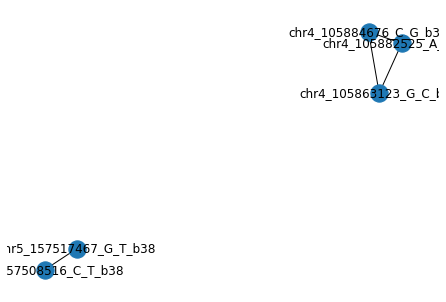

In [58]:
net.draw(net.from_pandas_edgelist(tmp_df, "Expression","Methylation"), with_labels=True)


### Expression and Protein

In [59]:
tmp_df = pd.DataFrame()

for eqtl_variant in eqtl:
    for pqtl_variant in pqtl:
        # avoid looking at the same variant 
        if eqtl_variant != pqtl_variant:
            # if on the same chromosome 
            if eqtl_variant.split("_")[0] == pqtl_variant.split("_")[0]:
                distance = abs(int(eqtl_variant.split("_")[1])-int(pqtl_variant.split("_")[1]))
                # if they're close enough 
                if distance <= distance_threshold:
                    tmp_df = pd.concat([tmp_df,pd.DataFrame([[eqtl_variant,pqtl_variant, distance]])])

In [67]:
tmp_df.columns=["Expression", "Protein", "Distance"]
tmp_df

,Expression,Protein,Distance
0,chr6_32183666_C_T_b38,chr6_32182024_C_T_b38,1642


In [62]:
pqtl_df[(pqtl_df["variant.id1"].isin(tmp_df[1])) | (pqtl_df["variant.id2"].isin(tmp_df[1]))  ]

,trait,stratum,phenotype.id,EntrezGeneSymbol,rsid1,rsid2,nsnps,variant.id1,variant.id2,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,LD.R,anno.rsid1,anno.rsid2
0,FEV1FVC,All,SL003680_ENSG00000204305.14,AGER,rs2844456,rs9391855,1477,chr6_31896897_T_C_b38,chr6_32182024_C_T_b38,5.540000e-13,0.000287,1.320000e-10,0.066289,0.933424,0.58,EHMT2_Intron; C2_2KB Upstream,AGER_Intron


In [63]:
eqtl_df[(eqtl_df["variant.id1"].isin(tmp_df[0])) | (eqtl_df["variant.id2"].isin(tmp_df[0])) ]

,trait,stratum,phenotype.id,gene.name,start_pos,end_pos,strand,nsnps,variant.id1,variant.id2,PP.H0.abf.Exam1,PP.H1.abf.Exam1,PP.H2.abf.Exam1,PP.H3.abf.Exam1,PP.H4.abf.Exam1,LD.R
1,FEV1FVC,All,ENSG00000237541.3,HLA-DQA2,32741391,32747198,F,1760,chr6_31896897_T_C_b38,chr6_32183666_C_T_b38,3.340000e-15,5.430000e-07,7.740000e-10,0.124045,0.875955,0.51


### Methylation and Protein

In [64]:
for mqtl_variant in mqtl:
    for pqtl_variant in pqtl:
        # avoid looking at the same variant 
        if mqtl_variant != pqtl_variant:
            # if on the same chromosome 
            if mqtl_variant.split("_")[0] == pqtl_variant.split("_")[0]:
                distance = abs(int(mqtl_variant.split("_")[1])-int(pqtl_variant.split("_")[1])) 
                # if they're close enough 
                if distance <= distance_threshold:
                    print(mqtl_variant, pqtl_variant)